## Classification Metrics

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import category_encoders as CTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# load dataset 

df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Description

Key Features:

    PassengerId: Unique ID for each passenger.
    Pclass: Passenger class (1st, 2nd, 3rd).
    Name: Passenger's name.
    Sex: Gender of the passenger (male, female).
    Age: Age of the passenger.
    SibSp: Number of siblings/spouses aboard.
    Parch: Number of parents/children aboard.
    Ticket: Ticket number.
    Fare: Fare paid by the passenger.
    Cabin: Cabin number (many missing values).
    Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
    Survived: Target variable (0 = did not survive, 1 = survived).

In [3]:
df = df[["Pclass","Sex","Age","Survived"]]

df.head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [4]:
df.shape

(891, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [6]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

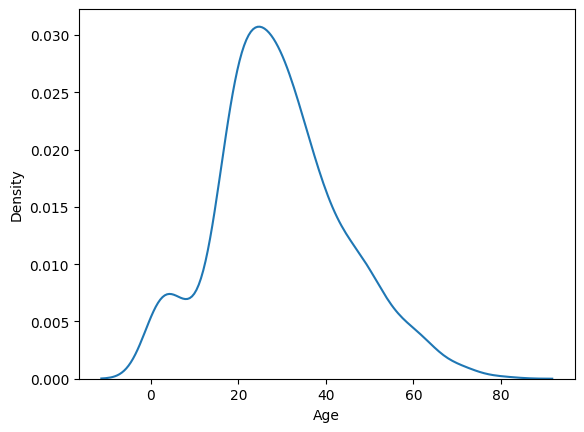

In [7]:
sns.kdeplot(x=df["Age"])

In [8]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [9]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

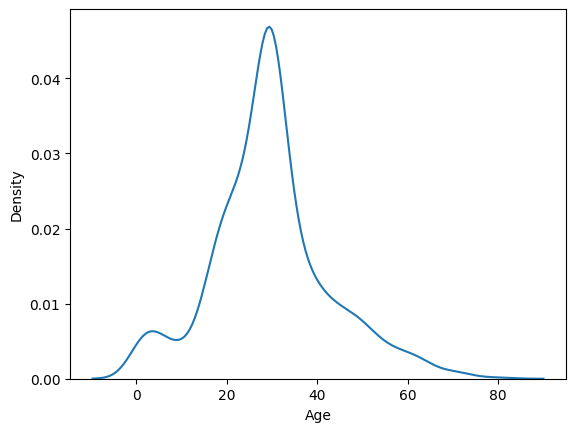

In [10]:
sns.kdeplot(x=df["Age"])

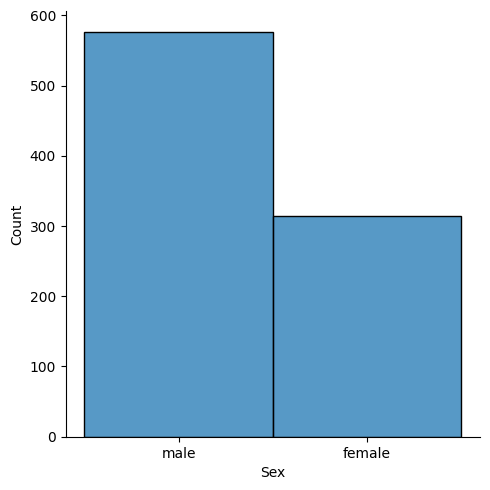

In [11]:
sns.displot(df,x="Sex")


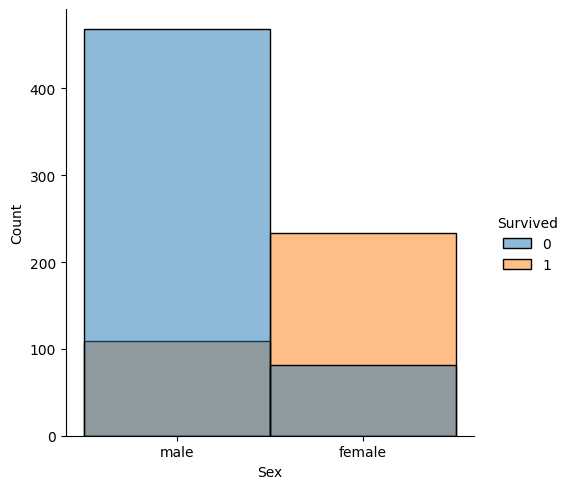

In [12]:
sns.displot(df,x="Sex",hue="Survived")

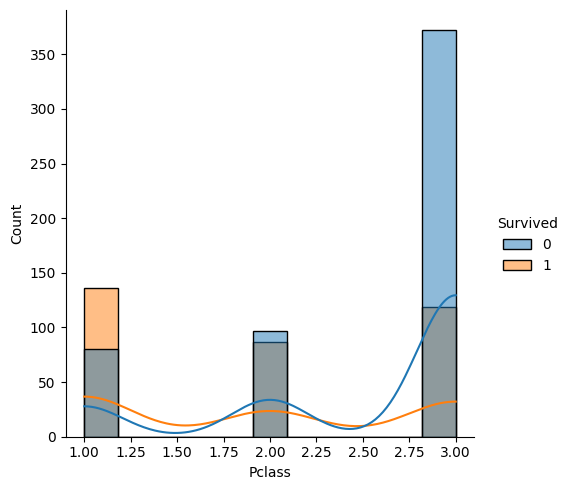

In [13]:
sns.displot(df,x="Pclass",hue="Survived",kde=True)

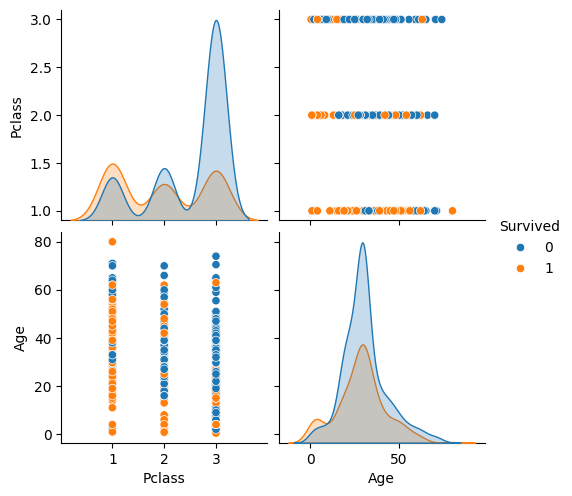

In [14]:
sns.pairplot(df,hue="Survived")

In [15]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [16]:

X_encoded = pd.get_dummies(X,columns=["Sex"],drop_first=True,dtype=int)
X_encoded.head()

,Pclass,Age,Sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [17]:
# encode using category_encoders
encoder = CTE.BinaryEncoder(drop_invariant=True)
X2 = encoder.fit_transform(X)
X2.head()

,Pclass,Sex_0,Sex_1,Age
0,3,0,1,22.0
1,1,1,0,38.0
2,3,1,0,26.0
3,1,1,0,35.0
4,3,0,1,35.0


## Test Train Split 

In [18]:
X_encoded_train,X_encoded_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42, test_size=0.2) 

## Modeling 

In [19]:
model =  LogisticRegression()

model.fit(X_encoded_train,y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_encoded_test)

## Classification Metrics

## Confusion matrix

A confusion matrix tells us four important things. Let's assume a model was trained for a Binary Classification task, meaning that every item in the dataset has a ground-truth value of 1 or 0. To make it easier to understand, let's pretend this model is trying to predict whether or not someone has a disease. A confusion matrix gives you the following information:

    True Positives (TP): The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    True Negatives (TN): The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    False Positives (FP): The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0).

    False Negatives (FN): The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

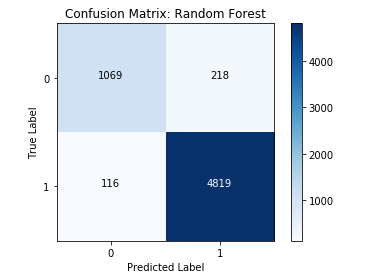

In [21]:
# example

from  sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
# define the confusion matrix
cfn = confusion_matrix(y_true=y_test,y_pred=y_pred)
cfn

array([[91, 14],
       [20, 54]])

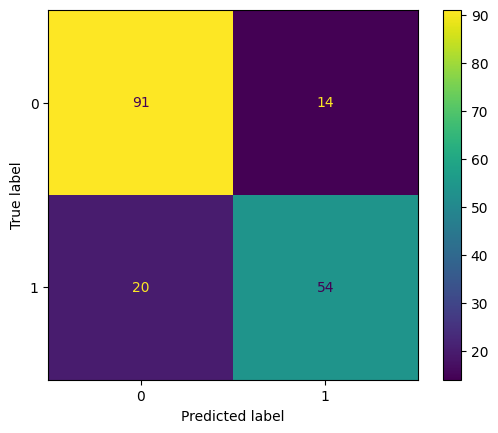

In [23]:
# plot the confusion matrix
# sns.heatmap(cfn,annot=True)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cfn, display_labels=model.classes_)
cnf_disp.plot()

In [24]:
# define the confusion matrix metrics
TP = cfn[1][1]
TN = cfn[0][0]
FP = cfn[0][1]
FN = cfn[1][0]

## For multi-class classification

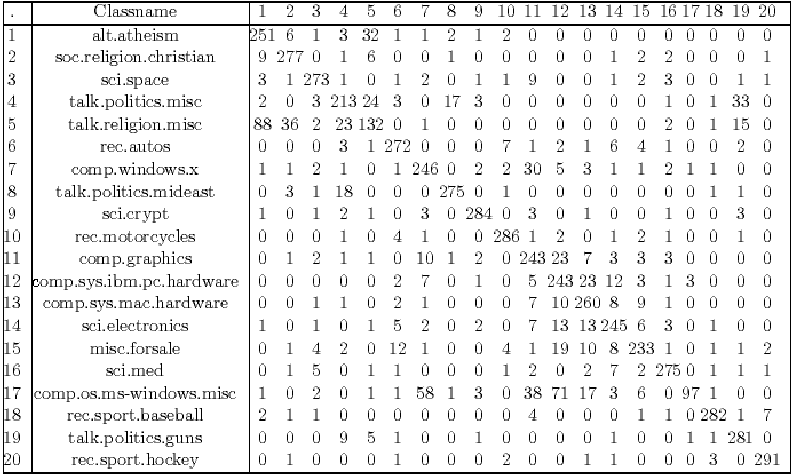

# Evaluation Metrics

### Precision and recall

Precision and Recall are two of the most basic evaluation metrics available to us. Precision measures how precise the predictions are, while Recall indicates what percentage of the classes we're interested in were actually captured by the model. 

## Precision
**Precision** is a classification metric that measures the accuracy of positive predictions made by a classification model. It answers the question: 

*"Of all the instances that the model predicted as positive, how many were actually positive?"*

### Formula for Precision:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

### Explanation:
- Precision focuses on how reliable the positive predictions are.
- A high precision means that the model does not make many false positive predictions.
- Precision is particularly useful when the cost of false positives is high (e.g., in medical diagnosis, where a false positive could lead to unnecessary treatments or procedures).

In [25]:
# print out cfn
cfn

array([[91, 14],
       [20, 54]])

In [26]:
# manualy  calcualte prescision
p = TP/(TP+FP)
p

np.float64(0.7941176470588235)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Recall

Recall (also known as Sensitivity or True Positive Rate) is a classification metric that measures the ability of a model to correctly identify all relevant positive instances. It answers the question:

"Of all the actual positive instances, how many did the model correctly identify as positive?"
Formula for Recall:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

Explanation:

    Recall focuses on how well the model detects positive instances.
    A high recall means the model did a good job identifying most of the actual positive instances, but it may also increase the false positives.
    Recall is especially important when missing a positive instance is costly (e.g., in medical diagnostics, where missing a disease could be dangerous)

In [28]:
# manual calculation
r = (TP)/(TP+FN)
r

np.float64(0.7297297297297297)

## Accuracy

**Accuracy** is a classification metric that measures the overall correctness of the model. It answers the question:

*"Of all the instances, how many did the model correctly classify?"*

### Formula for Accuracy:


$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}}
$$

### Explanation:
- Accuracy evaluates how often the model is correct in both positive and negative classifications.
- It is generally used when the classes are balanced. If the classes are imbalanced, accuracy can be misleading (i.e., it may be high even if the model is missing many positive instances).
  


Thus, the model has an accuracy of 0.8, or 80%, meaning it correctly classified 80% of the instances.



In [29]:
# manualy calculate accuracy
acc = (TP+TN)/(TP+TN+FP+FN)
acc

np.float64(0.8100558659217877)

### F1 Score in Classification Metrics

The **F1 Score** is a classification metric that combines both precision and recall into a single metric. It is the harmonic mean of precision and recall and is particularly useful when there is an uneven class distribution (i.e., when one class is more frequent than the other).

### Formula for F1 Score:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Explanation:
- The F1 Score gives a balance between precision and recall. It is useful when you need to take both false positives and false negatives into account.
- A higher F1 score indicates a better model performance, with both precision and recall being high.
- It is often used when the class distribution is imbalanced, and you want to balance the model’s performance on both the positive and negative classes.



In [30]:
# f1 score example
f1 = ((p*r)/(p+r))*2
f1

np.float64(0.7605633802816901)

### using Classification report 

In [31]:
# example using classification report 
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test,y_pred=y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## ROC Curve and AUC in Classification Metrics

The **ROC (Receiver Operating Characteristic)** curve and **AUC (Area Under the Curve)** are used to evaluate the performance of a classification model, especially for binary classification problems.

- **ROC Curve**: The ROC curve is a graphical representation of a model's performance at all classification thresholds. It plots the **True Positive Rate (Recall)** against the **False Positive Rate**.

- **AUC (Area Under the Curve)**: The AUC is the area under the ROC curve, and it quantifies the overall ability of the model to distinguish between the positive and negative classes.

### Formula for ROC Curve:
- **True Positive Rate (Recall)**:

  $$
  
  \text{True Positive Rate (TPR)} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  
  $$
  
  
- **False Positive Rate (FPR)**:

  $$
  
  \text{False Positive Rate (FPR)} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
  
  $$

### ROC Curve:
- The ROC curve is plotted by calculating TPR and FPR at various threshold values, and plotting TPR (y-axis) vs FPR (x-axis).

### AUC:
The AUC is the area under the ROC curve, which quantifies the model's ability to distinguish between positive and negative classes.


In [32]:
# example
from sklearn.metrics import roc_curve

In [33]:
fpr_test,tpr_test,thres=roc_curve(y_true=y_train,y_score=model.decision_function(X_encoded_train))

In [34]:
print(thres)

[        inf  3.04127396  2.7041148   2.65224416  2.60037352  2.54850288
  2.52256756  2.49663223  2.47069691  2.44476159  2.34102031  2.31508499
  2.28914967  2.23727903  2.18540839  2.08166711  1.97792583  1.95199051
  1.85085044  1.84824922  1.8223139   1.79637858  1.69523852  1.6926373
  1.59149724  1.58889602  1.56556192  1.46182064  1.43588532  1.40995
  1.35807936  1.33214404  1.28807688  1.2802734   1.21543509  1.20246743
  1.17653211  1.12466147  0.99758609  0.99498487  0.97165077  0.96904955
  0.94571545  0.91978013  0.89384481  0.89124359  0.81603885  0.81343763
  0.79010353  0.76416821  0.76156699  0.73823289  0.68636225  0.66042693
  0.6578257   0.64745927  0.63449161  0.63189038  0.60855628  0.59602469
  0.58262096  0.55668564  0.5161439   0.504815    0.47887968  0.45294436
  0.42700904  0.40107372  0.3751384   0.34920308  0.32326776  0.29733244
  0.27139712  0.25326528  0.2454618   0.21952648  0.16765584  0.15304942
  0.1271141   0.08984988 -0.01389141 -0.02849783 -0.039

In [35]:
fpr1,tpr1,_ = roc_curve(y_true=y_test,y_score=model.decision_function(X_encoded_test))

<function matplotlib.pyplot.show(close=None, block=None)>

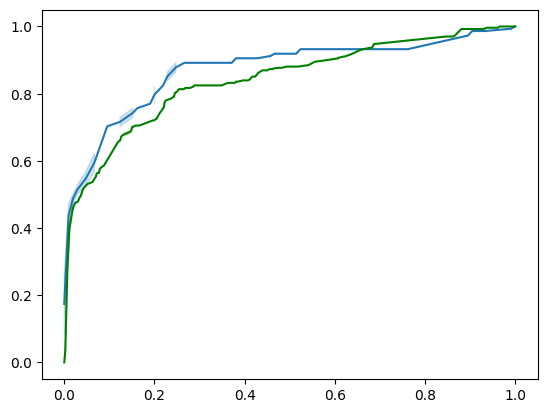

In [36]:
sns.lineplot(x=fpr1,y=tpr1)
sns.lineplot(x=fpr_test,y=tpr_test,color="green")
plt.show

In [37]:
from sklearn.metrics import auc

area = auc(fpr1,tpr1)
area

np.float64(0.8718790218790219)

## Class imbalance Problems 

Class imbalance occurs when the classes in a classification problem are not equally represented. For example, in a binary classification task, if one class (e.g., the positive class) significantly outnumbers the other (e.g., the negative class), the dataset is said to be imbalanced.

Class imbalance can significantly affect the performance metrics of a classification model. In particular, metrics such as accuracy, precision, recall, F1 score, and AUC can be misleading if the imbalance is not addressed.

In [38]:
y_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

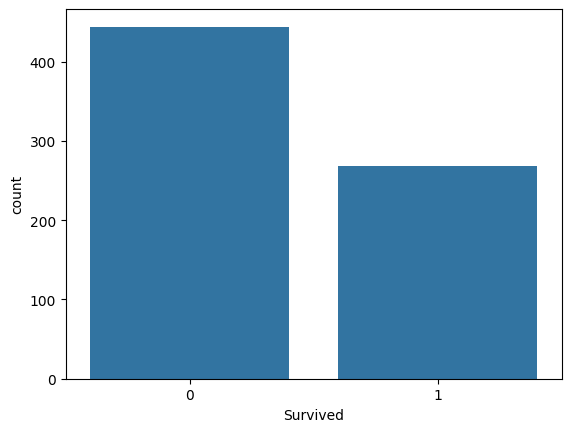

In [39]:
sns.countplot(x=y_train)

## Smote

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in machine learning problems, particularly for classification tasks. It is an oversampling method that generates synthetic samples from the minority class by interpolating between existing minority class samples.
How SMOTE Works:

    SMOTE works by selecting examples from the minority class and generating synthetic examples by choosing a random point along the line between a sample and one of its nearest neighbors from the minority class.
    
    These new synthetic samples are used to balance the dataset, which helps machine learning models to learn better and avoid bias toward the majority class.


In [ ]:
# import SMOTE from imblearn
# from imblearn import under_sampling 
# from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [41]:
# Smote 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_encoded_train,y_train)

y_train_smote.value_counts()

Survived
0    444
1    444
Name: count, dtype: int64

In [42]:
model = LogisticRegression()

model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [43]:
y_pred_smote = model.predict(X_encoded_test)

report2 = classification_report(y_true=y_test,y_pred=y_pred_smote)
print(report2)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       105
           1       0.74      0.84      0.78        74

    accuracy                           0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.81      0.81       179



In [44]:
fpr,tpr,_ = roc_curve(y_true=y_test,y_score=model.decision_function(X_encoded_test))

<Axes: >

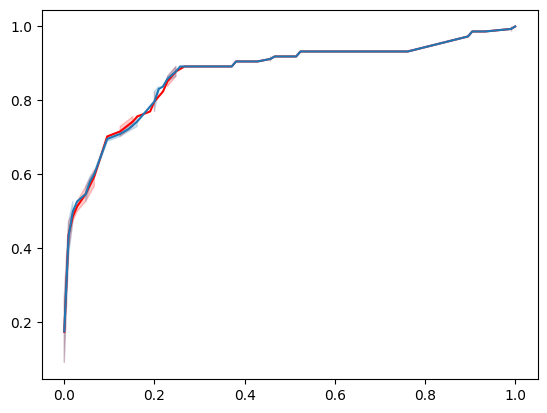

In [45]:
sns.lineplot(x=fpr1,y=tpr1,color="red")
sns.lineplot(x=fpr,y=tpr)

In [46]:
area2 = auc(fpr,tpr)
area2

np.float64(0.8714929214929215)

In [47]:
print(f"""
        Without Smote AUC = {area}
        
        with Smote  AUC = {area2}
      
      """)


        Without Smote AUC = 0.8718790218790219

        with Smote  AUC = 0.8714929214929215

      


In [48]:
print(report,report2)


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       105
           1       0.74      0.84      0.78        74

    accuracy                           0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.81      0.81       179



## Extras

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_smote, y_train_smote)
predictions = model.predict(X_encoded_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train_smote,y_train_smote)
y_pred =  model.predict(X_encoded_test)

In [51]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [52]:
report3 = classification_report(y_true=y_test,y_pred=predictions)
print(report3)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [53]:
fpr2,tpr2,_ = roc_curve(y_test,model.predict_proba(X_encoded_test)[:,1])

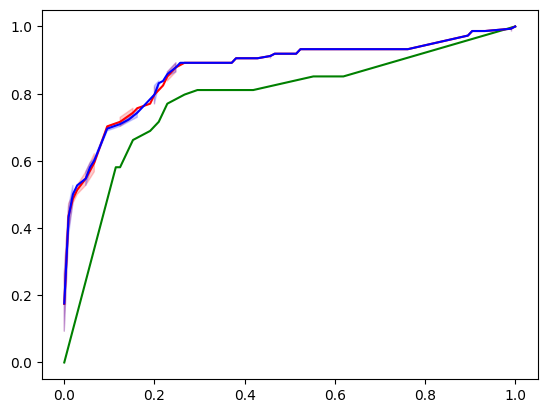

In [54]:
sns.lineplot(x=fpr2,y=tpr2,color="green")
sns.lineplot(x=fpr1,y=tpr1,color="red")
sns.lineplot(x=fpr,y=tpr,color="blue")
plt.show()

In [55]:
area3 = auc(fpr,tpr) 
area3

np.float64(0.8714929214929215)

In [56]:
print(f"""
        Without Smote AUC = {area}
        
        with Smote  AUC = {area2}
        
        Random forest Smote  AUC = {area3}
      
      """)


        Without Smote AUC = 0.8718790218790219

        with Smote  AUC = 0.8714929214929215

        Random forest Smote  AUC = 0.8714929214929215

      
